# Heart Attack Risk Prediction

For Part 2:Neural Network of the final project in the CS591 Advanced Artificial Intelligence class, our group's topic of interest was agreed upon to focus on the medical field. The chosen dataset, labeled "Data of Patients (For Medical Field)", was sourced from Kaggle. You can download it using the following link: https://www.kaggle.com/datasets/tarekmuhammed/patients-data-for-medical-field/data.
The dataset consists of patient information, including demographic details such as age, sex, and state, along with health-related factors like general health, BMI, and medical history. It covers conditions such as heart disease, stroke, diabetes, and asthma, as well as lifestyle factors like smoking, alcohol consumption, and vaccination status.The primary purpose of the dataset is for heart disease prediction. 

In our application, we utilized the "HadHeartAttack" feature as an indicator of heart disease, which serves as our target variable. We will try to predict the condition of heart disease throughout a classification algorithm based on a neural network.


## Preprocessing Data + Regularization

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np

# including path to the dataset
file_path = "Patients Data ( Used for Heart Disease Prediction ).xlsx"
data = pd.read_excel(file_path)
print(data.head())

   PatientID    State     Sex GeneralHealth   AgeCategory  HeightInMeters  \
0          1  Alabama  Female          Fair  Age 75 to 79            1.63   
1          2  Alabama  Female     Very good  Age 65 to 69            1.60   
2          3  Alabama    Male     Excellent  Age 60 to 64            1.78   
3          4  Alabama    Male     Very good  Age 70 to 74            1.78   
4          5  Alabama  Female          Good  Age 50 to 54            1.68   

   WeightInKilograms        BMI  HadHeartAttack  HadAngina  ...  \
0          84.820000  32.099998               0          1  ...   
1          71.669998  27.990000               0          0  ...   
2          71.209999  22.530001               0          0  ...   
3          95.250000  30.129999               0          0  ...   
4          78.019997  27.760000               0          0  ...   

                             ECigaretteUsage  ChestScan  \
0  Never used e-cigarettes in my entire life          1   
1  Never used e-

In [2]:
# dropping unnecessary columns (to reduce data noise)
drop_elements = ['PatientID']  
data = data.drop(columns=drop_elements, errors='ignore')  # `errors='ignore'` ensures no error if column doesn't exist

# moving the target column ('HadHeartAttack') to the end for convenience
data = data[[col for col in data.columns if col != 'HadHeartAttack'] + ['HadHeartAttack']]

# show the structure of the data
print(data.head())

     State     Sex GeneralHealth   AgeCategory  HeightInMeters  \
0  Alabama  Female          Fair  Age 75 to 79            1.63   
1  Alabama  Female     Very good  Age 65 to 69            1.60   
2  Alabama    Male     Excellent  Age 60 to 64            1.78   
3  Alabama    Male     Very good  Age 70 to 74            1.78   
4  Alabama  Female          Good  Age 50 to 54            1.68   

   WeightInKilograms        BMI  HadAngina  HadStroke  HadAsthma  ...  \
0          84.820000  32.099998          1          0          1  ...   
1          71.669998  27.990000          0          0          0  ...   
2          71.209999  22.530001          0          0          0  ...   
3          95.250000  30.129999          0          0          0  ...   
4          78.019997  27.760000          0          0          0  ...   

   ChestScan     RaceEthnicityCategory  AlcoholDrinkers  HIVTesting  \
0          1  White only, Non-Hispanic                0           0   
1          0  White on

### Label Encoding

#### Identify columns needing to be encoded

In [3]:
#Label encoding transforms categorical data into a format our model can use
# identify a list of all columns with type 'object' 
object_columns = data.select_dtypes(include=['object']).columns.tolist()

# print the list of object columns
print("Columns with type 'object':")
print(object_columns)

for column in object_columns:
    print(f'\nUnique {column} Categories: {data[column].unique()}')

Columns with type 'object':
['State', 'Sex', 'GeneralHealth', 'AgeCategory', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'TetanusLast10Tdap']

Unique State Categories: ['Alabama' 'Alaska' 'Arizona' 'California' 'Arkansas' 'Connecticut'
 'Colorado' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Indiana'
 'District of Columbia' 'Kansas' 'Iowa' 'Maryland' 'Minnesota' 'Montana'
 'New Jersey' 'Nebraska' 'New York' 'Ohio' 'Oklahoma' 'Texas' 'Vermont'
 'Washington' 'Utah' 'Illinois' 'West Virginia' 'Virginia' 'Massachusetts'
 'Kentucky' 'Louisiana' 'Maine' 'Wisconsin' 'Michigan' 'Mississippi'
 'Missouri' 'Nevada' 'New Hampshire' 'New Mexico' 'South Carolina'
 'North Carolina' 'North Dakota' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Dakota' 'Tennessee' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

Unique Sex Categories: ['Female' 'Male']

Unique GeneralHealth Categories: ['Fair' 'Very good' 'Excellent' 'Good' 'Poor']

Unique AgeCategory Categories: ['

In [4]:
# importing required library for label encoding
from sklearn.preprocessing import LabelEncoder

# the LabelEncoder initializing step
label_encoder = LabelEncoder()

# encoding 'State' column using LabelEncoder 
data['State'] = label_encoder.fit_transform(data['State'])  # this step transforms categorical data to numeric
unique_states = data['State'].unique()

# encoding sex categories ['Female', 'Male']
# manual because only two unique values + manual is more accurate for binary categories
data['Sex'] = data['Sex'].replace({'Male': 0, 'Female': 1})

# encoding unique GeneralHealth categories: ['Fair', 'Very good', 'Excellent', 'Good', 'Poor']
data['GeneralHealth'] = data['GeneralHealth'].replace({
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
})

#'AgeCategory'
data['AgeCategory'] = data['AgeCategory'].replace({
    'Age 18 to 24': 0,
    'Age 25 to 29': 1,
    'Age 30 to 34': 2,
    'Age 35 to 39': 3,
    'Age 40 to 44': 4,
    'Age 45 to 49': 5,
    'Age 50 to 54': 6,
    'Age 55 to 59': 7,
    'Age 60 to 64': 8,
    'Age 65 to 69': 9,
    'Age 70 to 74': 10,
    'Age 75 to 79': 11,
    'Age 80 or older': 12
})

# 'HadDiabetes'
data['HadDiabetes'] = data['HadDiabetes'].replace({
    'No': 0,
    'Yes': 1,
    'No, pre-diabetes or borderline diabetes': 2,
    'Yes, but only during pregnancy (female)': 3
})

#'SmokerStatus' 
data['SmokerStatus'] = data['SmokerStatus'].replace({
    'Never smoked': 0,
    'Former smoker': 1,
    'Current smoker - now smokes some days': 2,
    'Current smoker - now smokes every day': 3
})

# 'ECigaretteUsage' 
data['ECigaretteUsage'] = data['ECigaretteUsage'].replace({
    'Never used e-cigarettes in my entire life': 0,
    'Not at all (right now)': 1,
    'Use them some days': 2,
    'Use them every day': 2  # Grouped together with "Use them some days"
})

#'RaceEthnicityCategory'
# using LabelEncoder since categories are unrelated
data['RaceEthnicityCategory'] = label_encoder.fit_transform(data['RaceEthnicityCategory'])

# 'TetanusLast10Tdap' 
data['TetanusLast10Tdap'] = data['TetanusLast10Tdap'].replace({
    'No, did not receive any tetanus shot in the past 10 years': 0,
    'Yes, received Tdap': 1,
    'Yes, received tetanus shot but not sure what type': 2,
    'Yes, received tetanus shot, but not Tdap': 3
})

# show first few rows of the processed dataset
print(data.head())


C:\Users\virav\AppData\Local\Temp\ipykernel_8640\1642435663.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({'Male': 0, 'Female': 1})
C:\Users\virav\AppData\Local\Temp\ipykernel_8640\1642435663.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['GeneralHealth'] = data['GeneralHealth'].replace({
C:\Users\virav\AppData\Local\Temp\ipykernel_8640\1642435663.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behav

   State  Sex  GeneralHealth  AgeCategory  HeightInMeters  WeightInKilograms  \
0      0    1              1           11            1.63          84.820000   
1      0    1              3            9            1.60          71.669998   
2      0    0              4            8            1.78          71.209999   
3      0    0              3           10            1.78          95.250000   
4      0    1              2            6            1.68          78.019997   

         BMI  HadAngina  HadStroke  HadAsthma  ...  ChestScan  \
0  32.099998          1          0          1  ...          1   
1  27.990000          0          0          0  ...          0   
2  22.530001          0          0          0  ...          0   
3  30.129999          0          0          0  ...          0   
4  27.760000          0          0          0  ...          1   

   RaceEthnicityCategory  AlcoholDrinkers  HIVTesting  FluVaxLast12  \
0                      4                0           0    

C:\Users\virav\AppData\Local\Temp\ipykernel_8640\1642435663.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['SmokerStatus'] = data['SmokerStatus'].replace({
C:\Users\virav\AppData\Local\Temp\ipykernel_8640\1642435663.py:58: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ECigaretteUsage'] = data['ECigaretteUsage'].replace({
C:\Users\virav\AppData\Local\Temp\ipykernel_8640\1642435663.py:70: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavio

### Simplified Columns

In [5]:
# make a copy of the original dataframe to test simplified columns
data_simplified = data.copy()

In [6]:
# Encode simplified dataset
#this step will help a model do not overcomplicate things by trying to learn differences that might not matter much +reducing noise

# initializing
label_encoder = LabelEncoder()

# categories have no inherent order(non ordinal), and label encoding assigns arbitrary numeric values to the categories
data_simplified['State'] = label_encoder.fit_transform(data_simplified['State'])  

# this column is binary categorical, and manual encoding is clear and straightforward for two categories.
data_simplified['Sex'] = data_simplified['Sex'].replace({'Male': 0, 'Female': 1})

# these columns 'General Health' and "Age Category' are ordinal categorical and manual encoding preserves their order.
data_simplified['GeneralHealth'] = data_simplified['GeneralHealth'].replace({
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 2,
    'Excellent': 2
})


data_simplified['AgeCategory'] = data_simplified['AgeCategory'].replace({
    'Age 18 to 24': 0,
    'Age 25 to 29': 0,
    'Age 30 to 34': 1,
    'Age 35 to 39': 1,
    'Age 40 to 44': 2,
    'Age 45 to 49': 2,
    'Age 50 to 54': 3,
    'Age 55 to 59': 3,
    'Age 60 to 64': 4,
    'Age 65 to 69': 4,
    'Age 70 to 74': 5,
    'Age 75 to 79': 5,
    'Age 80 or older': 6
})

# 'HadDiabetes','SmokerStatus','ECigaretteUsage' are categorical columns with more than two categories, 
#but the values have specific meanings or relationships. Manual mapping ensures clarity and accuracy.
data_simplified['HadDiabetes'] = data_simplified['HadDiabetes'].replace({
    'No': 0,
    'Yes': 1,
    'No, pre-diabetes or borderline diabetes': 2,
    'Yes, but only during pregnancy (female)': 3
})

data_simplified['SmokerStatus'] = data_simplified['SmokerStatus'].replace({
    'Never smoked': 0,
    'Former smoker': 1,
    'Current smoker - now smokes some days': 2,
    'Current smoker - now smokes every day': 3
})

data_simplified['ECigaretteUsage'] = data_simplified['ECigaretteUsage'].replace({
    'Never used e-cigarettes in my entire life': 0,
    'Not at all (right now)': 1,
    'Use them some days': 2,
    'Use them every day': 3  # grouping similar categories
})

# here we use LabelEncoder
# this converts non-ordinal categorical values (e.g., 'White only, Non-Hispanic') into numeric labels
data_simplified['RaceEthnicityCategory'] = label_encoder.fit_transform(data_simplified['RaceEthnicityCategory'])


data_simplified['TetanusLast10Tdap'] = data_simplified['TetanusLast10Tdap'].replace({
    'No, did not receive any tetanus shot in the past 10 years': 0,
    'Yes, received Tdap': 1,
    'Yes, received tetanus shot but not sure what type': 1,
    'Yes, received tetanus shot, but not Tdap': 1
})

# verifying step - that all object columns are encoded
print(f"Encoded Dataset types: \n{data.dtypes}")
print(f"\nEncoded Simplified Dataset types: \n{data_simplified.dtypes}")

Encoded Dataset types: 
State                          int64
Sex                            int64
GeneralHealth                  int64
AgeCategory                    int64
HeightInMeters               float64
WeightInKilograms            float64
BMI                          float64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
HadDiabetes                    int64
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
SmokerStatus                   int64
ECigaretteUsage                int64
ChestScan                      int64
RaceEthnicityCategory          int64
AlcoholDrinker

## Feature Selection

### Set-up for Training/Testing

In [7]:
# needed libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# next function performs feature selection, data splitting, and standardization as part of preprocessing (70% train, 30% test)
def preprocess_data(data, test_size=0.3, random_state=42):
    """
    Parameters:
    dat- DF to preprocess
    test_size- proportion of the dataset to include in the test split
    random_state- random seed for reproducibility

    Returns:
    X_train_std- standardized training features
    X_test_std- standardized testing features
    y_train- training target
    y_test- testing target
    """

    X = data.iloc[:, :-1]  # features (all columns except the last one)
    y = data.iloc[:, -1]   # target (the last column)

    # splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # standardizing the features
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)  
    X_test_std = scaler.transform(X_test)        

    return X_train_std, X_test_std, y_train, y_test

# preprocessing original dataset
X_train_std, X_test_std, y_train, y_test = preprocess_data(data)

# preprocessing simplified dataset
X_train_std_simplified, X_test_std_simplified, y_train_simplified, y_test_simplified = preprocess_data(data_simplified)


### Correlation

In [8]:
# Regular Data Correlation

#compute + display the correlation matrix for the original dataset
correlation_matrix = data.corr()
print("Original Data Correlation with Target Variable:")
print(correlation_matrix['HadHeartAttack'].sort_values(ascending=False))

Original Data Correlation with Target Variable:
HadHeartAttack               1.000000
HadAngina                    0.446480
HadStroke                    0.177718
AgeCategory                  0.172569
ChestScan                    0.168255
DifficultyWalking            0.159348
HadCOPD                      0.133071
PneumoVaxEver                0.120133
HadArthritis                 0.118072
HadKidneyDisease             0.109800
HadDiabetes                  0.101198
DeafOrHardOfHearing          0.098196
DifficultyErrands            0.089521
DifficultyDressingBathing    0.082843
SmokerStatus                 0.077225
BlindOrVisionDifficulty      0.073039
DifficultyConcentrating      0.051840
HadSkinCancer                0.049543
FluVaxLast12                 0.046403
WeightInKilograms            0.038411
BMI                          0.030210
RaceEthnicityCategory        0.025060
HadAsthma                    0.024252
HadDepressiveDisorder        0.023982
HeightInMeters               0.023305
Te

In [9]:
#compute + display the correlation matrix for the SIMPLIFIED dataset
correlation_matrix_simplified = data_simplified.corr()
print("\nSimplified Data Correlation with Target Variable:")
print(correlation_matrix_simplified['HadHeartAttack'].sort_values(ascending=False))


Simplified Data Correlation with Target Variable:
HadHeartAttack               1.000000
HadAngina                    0.446480
HadStroke                    0.177718
AgeCategory                  0.172569
ChestScan                    0.168255
DifficultyWalking            0.159348
HadCOPD                      0.133071
PneumoVaxEver                0.120133
HadArthritis                 0.118072
HadKidneyDisease             0.109800
HadDiabetes                  0.101198
DeafOrHardOfHearing          0.098196
DifficultyErrands            0.089521
DifficultyDressingBathing    0.082843
SmokerStatus                 0.077225
BlindOrVisionDifficulty      0.073039
DifficultyConcentrating      0.051840
HadSkinCancer                0.049543
FluVaxLast12                 0.046403
WeightInKilograms            0.038411
BMI                          0.030210
RaceEthnicityCategory        0.025060
HadAsthma                    0.024252
HadDepressiveDisorder        0.023982
HeightInMeters               0.023305

### Select Features

In [10]:
#columns to remove based on domain knowledge or low correlation with the target
remove_columns=['HadSkinCancer', 'FluVaxLast12', 'WeightInKilograms', 
                'BMI', 'HadAsthma', 'HadDepressiveDisorder', 
                'HeightInMeters', 'State', 'TetanusLast10Tdap', 
                'HIVTesting', 'ECigaretteUsage', 'RaceEthnicityCategory',
                'CovidPos', 'HighRiskLastYear', 'DifficultyErrands', 
                'DifficultyDressingBathing', 'SmokerStatus', 
                'BlindOrVisionDifficulty', 'DifficultyConcentrating', 
                'Sex', 'AlcoholDrinkers', 'DeafOrHardOfHearing']
#drop the selected columns from both datasets
data = data.drop(columns=remove_columns, errors='ignore')
data_simplified = data_simplified.drop(columns=remove_columns, errors='ignore')



### Test Reduced Feature Data

In [12]:
# Preprocessing  ( after changes by feature selection)

def preprocess_data(data, test_size=0.3, random_state=42):
    X = data.iloc[:, :-1]  
    y = data.iloc[:, -1]   
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    return X_train_std, X_test_std, y_train, y_test


X_train_std, X_test_std, y_train, y_test = preprocess_data(data)

X_train_std_simplified, X_test_std_simplified, y_train_simplified, y_test_simplified = preprocess_data(data_simplified)

# verifying shapes after preprocessing
print("\nProcessed Original Dataset Shapes:")
print(f"X_train: {X_train_std.shape}, X_test: {X_test_std.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

print("\nProcessed Simplified Dataset Shapes:")
print(f"X_train: {X_train_std_simplified.shape}, X_test: {X_test_std_simplified.shape}")
print(f"y_train: {y_train_simplified.shape}, y_test: {y_test_simplified.shape}")


Processed Original Dataset Shapes:
X_train: (166341, 11), X_test: (71289, 11)
y_train: (166341,), y_test: (71289,)

Processed Simplified Dataset Shapes:
X_train: (166341, 11), X_test: (71289, 11)
y_train: (166341,), y_test: (71289,)


In [13]:
#testing datasets accuracy

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    """
    Trains and evaluates a model, then prints its accuracy and classification report.

    Parameters:
    model -  model to evaluate
    X_train - training features
    X_test - testing features
    y_train - training labels
    y_test - testing labels

    """
  
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)


    print(f"{model_name} Accuracy: {accuracy_score(y_test, predictions)}")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, predictions)}\n")

# original dataset
print("Evaluating Models on Original Dataset:")
evaluate_model(RandomForestClassifier(random_state=42), X_train_std, X_test_std, y_train, y_test, "Random Forest (Original)")
evaluate_model(LogisticRegression(max_iter=1000), X_train_std, X_test_std, y_train, y_test, "Logistic Regression (Original)")

#simplified dataset
print("###################################################################")
print("Evaluating Models on Simplified Dataset:")
evaluate_model(RandomForestClassifier(random_state=42), X_train_std_simplified, X_test_std_simplified, y_train_simplified, y_test_simplified, "Random Forest (Simplified)")
evaluate_model(LogisticRegression(max_iter=1000), X_train_std_simplified, X_test_std_simplified, y_train_simplified, y_test_simplified, "Logistic Regression (Simplified)")




Evaluating Models on Original Dataset:
Random Forest (Original) Accuracy: 0.9424174837632734
Random Forest (Original) Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     67308
           1       0.47      0.21      0.29      3981

    accuracy                           0.94     71289
   macro avg       0.71      0.60      0.63     71289
weighted avg       0.93      0.94      0.93     71289


Logistic Regression (Original) Accuracy: 0.9449985271219964
Logistic Regression (Original) Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     67308
           1       0.52      0.22      0.31      3981

    accuracy                           0.94     71289
   macro avg       0.74      0.60      0.64     71289
weighted avg       0.93      0.94      0.93     71289


###################################################################
Evaluating Models on 

In [14]:
### Neural Network model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, classification_report

# function to define and build a Neural Network model
def build_nn(input_dim):
    """
    input_dim - number of input features 
    returns- model - a compiled neural network model ready for training
    """
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),  # increased neurons to capture more patterns
        BatchNormalization(),  # normalize activations to stabilize and speed up training
        Dropout(0.4),  # increased dropout rate to reduce overfitting
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # binary classification
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [16]:
# getting input dimension from the training data
input_dim = X_train_std_simplified.shape[1]

nn_model = build_nn(input_dim)

# callbacks for better training control
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # stop training if no improvement after 10 epochs
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,  # reduce learning rate by 20% when a plateau is detected
    patience=5,
    min_lr=1e-6  # minimum learning rate
)

# train the model with callbacks
history = nn_model.fit(
    X_train_std_simplified, y_train_simplified,
    validation_data=(X_test_std_simplified, y_test_simplified),
    epochs=50,  # Increased maximum epochs
    batch_size=32,
    verbose=2,
    callbacks=[early_stopping, reduce_lr]
)

# evaluate the model on the test set
y_pred_nn = nn_model.predict(X_test_std_simplified).flatten()
y_pred_nn = (y_pred_nn > 0.5).astype(int)

print("Neural Network Test Accuracy:", accuracy_score(y_test_simplified, y_pred_nn))
print("Neural Network Classification Report:\n", classification_report(y_test_simplified, y_pred_nn))

Epoch 1/50


C:\Users\virav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5199/5199 - 11s - 2ms/step - accuracy: 0.9423 - loss: 0.1613 - val_accuracy: 0.9445 - val_loss: 0.1537 - learning_rate: 1.0000e-03
Epoch 2/50
5199/5199 - 10s - 2ms/step - accuracy: 0.9448 - loss: 0.1524 - val_accuracy: 0.9447 - val_loss: 0.1539 - learning_rate: 1.0000e-03
Epoch 3/50
5199/5199 - 9s - 2ms/step - accuracy: 0.9452 - loss: 0.1508 - val_accuracy: 0.9454 - val_loss: 0.1528 - learning_rate: 1.0000e-03
Epoch 4/50
5199/5199 - 10s - 2ms/step - accuracy: 0.9455 - loss: 0.1500 - val_accuracy: 0.9457 - val_loss: 0.1537 - learning_rate: 1.0000e-03
Epoch 5/50
5199/5199 - 12s - 2ms/step - accuracy: 0.9458 - loss: 0.1500 - val_accuracy: 0.9456 - val_loss: 0.1527 - learning_rate: 1.0000e-03
Epoch 6/50
5199/5199 - 11s - 2ms/step - accuracy: 0.9457 - loss: 0.1495 - val_accuracy: 0.9457 - val_loss: 0.1532 - learning_rate: 1.0000e-03
Epoch 7/50
5199/5199 - 10s - 2ms/step - accuracy: 0.9459 - loss: 0.1495 - val_accuracy: 0.9456 - val_loss: 0.1517 - learning_rate: 1.0000e-03
Epoch 8/50
5199/51

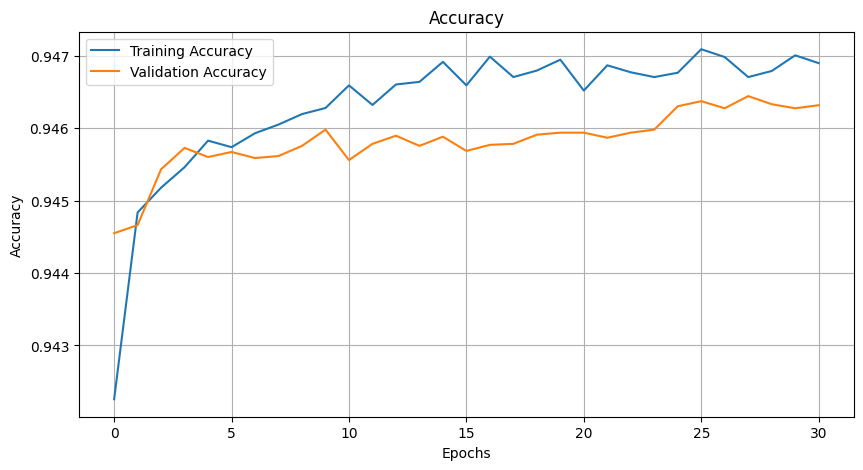

In [17]:
import matplotlib.pyplot as plt

# plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

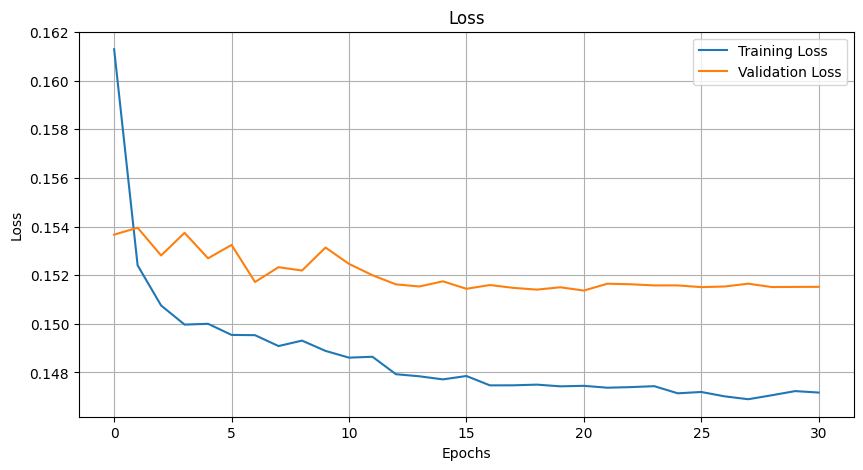

In [18]:
# plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [19]:
#Comparison -  Random Forest, Logistic Regression, and the Neural Network model

Evaluating Traditional Models on Simplified Dataset:
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     67308
           1       0.47      0.21      0.29      3981

    accuracy                           0.94     71289
   macro avg       0.71      0.60      0.63     71289
weighted avg       0.93      0.94      0.93     71289


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     67308
           1       0.52      0.22      0.31      3981

    accuracy                           0.94     71289
   macro avg       0.74      0.60      0.64     71289
weighted avg       0.93      0.94      0.93     71289


2228/2228 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     67308
           1      

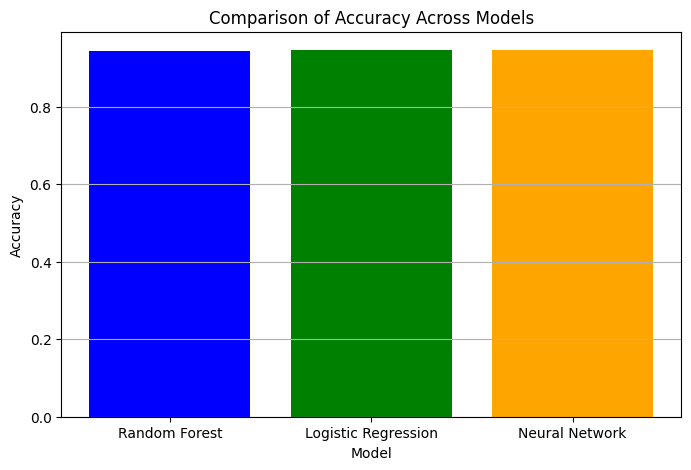

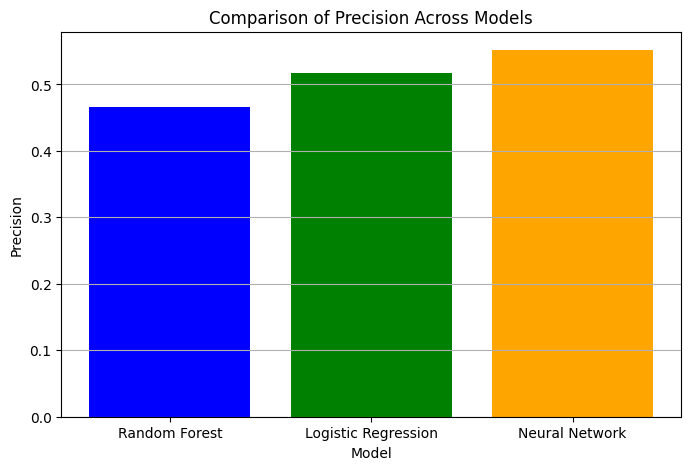

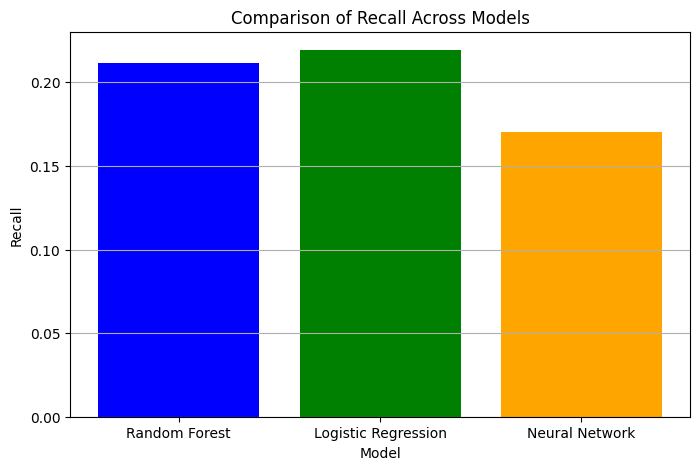

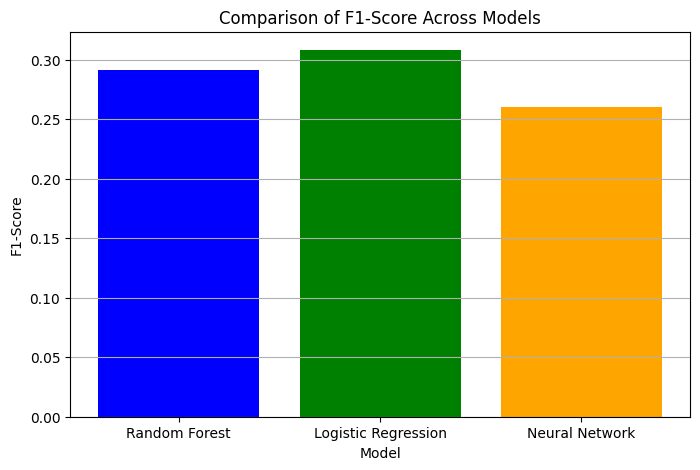

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

#  function definition to evaluate multiple models and collects metrics for comparison.
def evaluate_and_compare_models(models, X_train, X_test, y_train, y_test):
    """
    Parameters:
    models - list of tuples (model_name, model_instance)
    X_train - training features
    X_test - testing features
    y_train - training target
    y_test - testing target

    Returns - results - DataFrame containing evaluation metrics for all models
    """
    
    results = []
    for model_name, model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1
        })
        print(f"{model_name} Classification Report:\n{classification_report(y_test, predictions)}\n")
    return pd.DataFrame(results)

# models for evaluation
models = [
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(max_iter=1000))
]

# evaluating traditional models on the simplified dataset
print("Evaluating Traditional Models on Simplified Dataset:")
results = evaluate_and_compare_models(models, X_train_std_simplified, X_test_std_simplified, y_train_simplified, y_test_simplified)

# evaluating NN separately

y_pred_nn = nn_model.predict(X_test_std_simplified).flatten()
y_pred_nn = (y_pred_nn > 0.5).astype(int)

# to collect Neural Network metrics
nn_metrics = {
    "Model": "Neural Network",
    "Accuracy": accuracy_score(y_test_simplified, y_pred_nn),
    "Precision": precision_score(y_test_simplified, y_pred_nn),
    "Recall": recall_score(y_test_simplified, y_pred_nn),
    "F1-Score": f1_score(y_test_simplified, y_pred_nn)
}
print("Neural Network Classification Report:\n", classification_report(y_test_simplified, y_pred_nn))

# converting NN's metrics to DataFrame and concatenate
nn_metrics_df = pd.DataFrame([nn_metrics])
results = pd.concat([results, nn_metrics_df], ignore_index=True)

# showing results in a table
print("\nModel Comparison Metrics:")
print(results)

# comparison vizualization
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.bar(results["Model"], results[metric], color=['blue', 'green', 'orange'])
    plt.title(f"Comparison of {metric} Across Models")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.grid(axis='y')
    plt.show()
